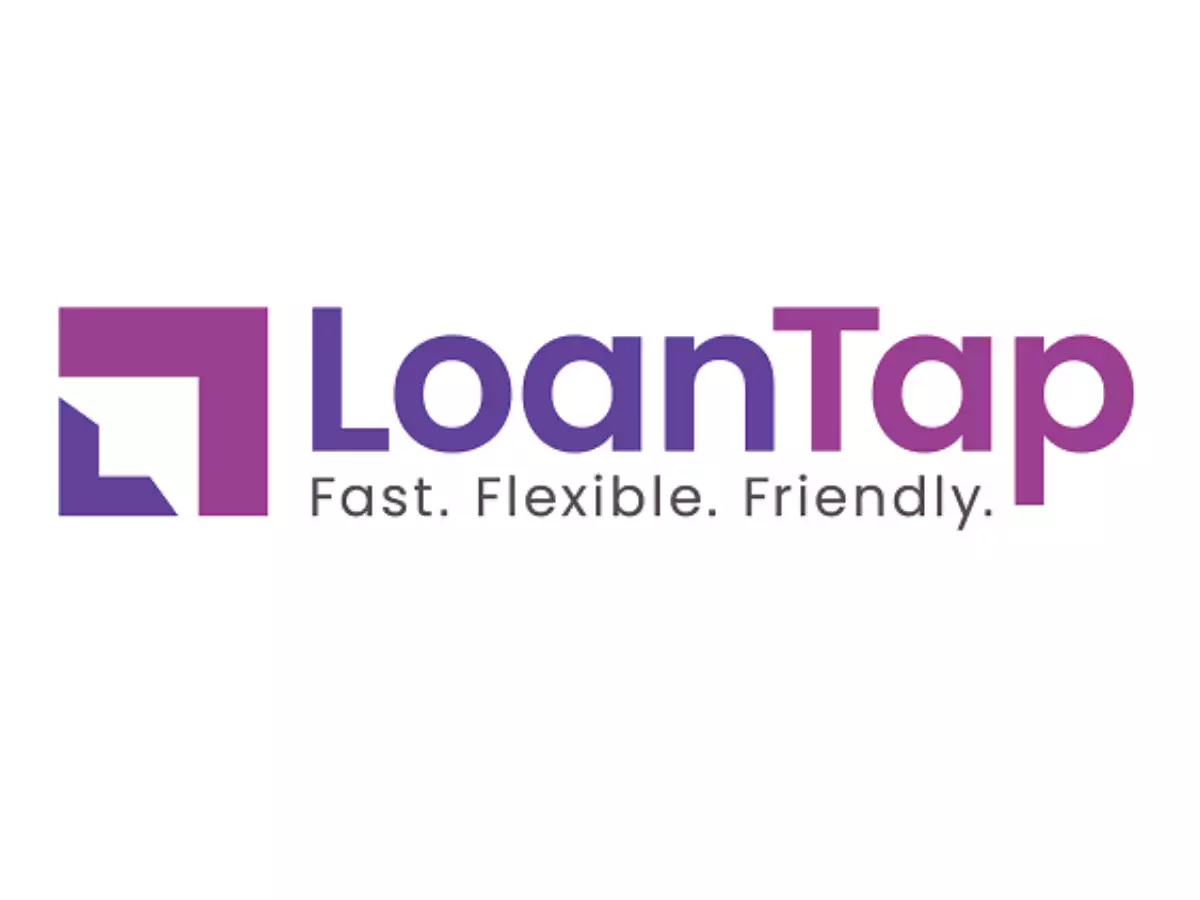

### 🏦 Logistic Regression for Bank Loan Approval Analysis

**🎯 Objective**:
With ample financial data available, the Banking Institute aims to understand key determinants in extending credit lines. This analysis assists the Bank in grasping significant loan approval factors and their interplay. The ultimate goal is to devise a model predicting if a credit line should be extended based on individual attributes.

**📊 Project Breakdown**:
This analytical journey encompasses the following methodologies and techniques:

1. **🔍 Exploratory Data Analysis (EDA)**: Comprehensive exploration to identify patterns, correlations, and outliers.
2. **🛠 Feature Engineering**: Innovating from the existing dataset to enhance model classification.
3. **📐 Logistic Regression Implementation** : Constructing a Logistic Regression model using Sklearn.
4. **📝 Classification Report**: Detailed metrics including accuracy, precision, recall, and F1-score.
5. **📉 ROC-AUC Curve Analysis**: Evaluating class distinction ability.
6. **📊 Precision-Recall Curve**: Unpacking the precision-recall trade-off for varied threshold values.
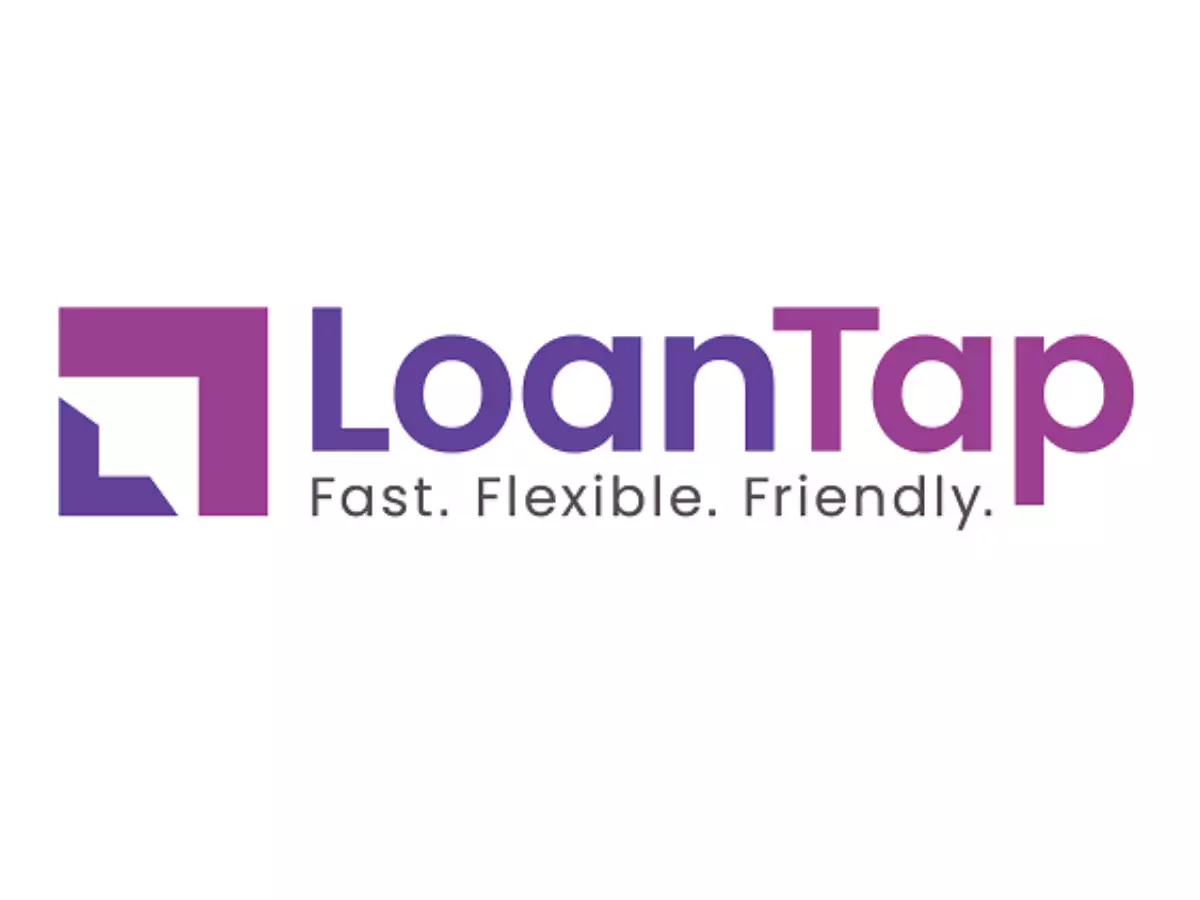
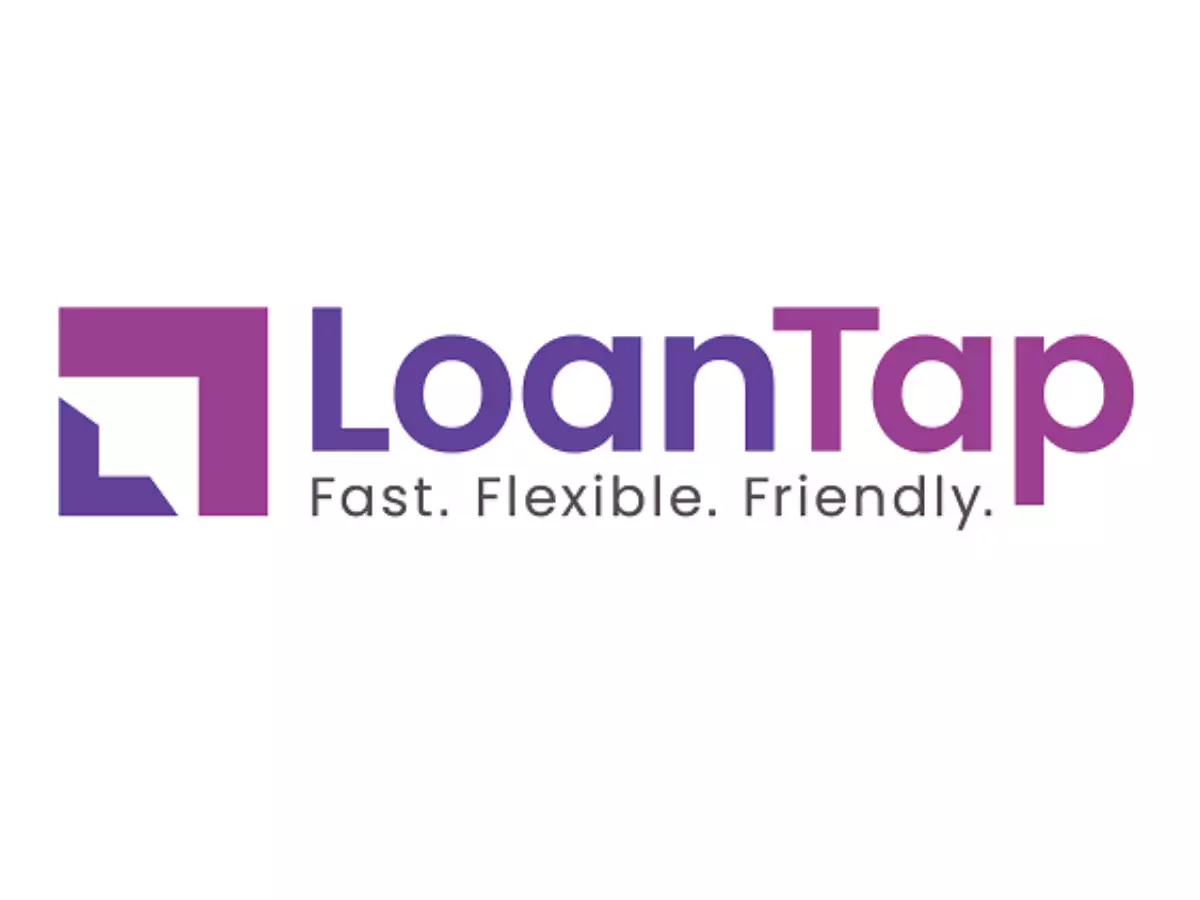

### Importing Libraries

In [2]:
# Scientific libraries
import numpy as np
import pandas as pd 
import scipy 
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, roc_curve

# Visual libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Helper libraries (Not that important, can be skipped)
import warnings
warnings.filterwarnings('ignore')

# Visual setup (With the figure format set as retina, high resolution plots can be generated)
%config InlineBackend.figure_format = 'retina'  

# Pandas options (If you have 2 to 3 lines of code in a single block, it will
# show the output of all the lines of codes not just the output of last line of code)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Table styles (This is just for making the df table look decorative, not important)
table_styles = {
    'cerulean_palette': [
        dict(selector="th", props=[("color", "#FFFFFF"), ("background", "#004D80"), ("text-transform", "capitalize")]),
        dict(selector="td", props=[("color", "#333333")]),
        dict(selector="table", props=[("font-family", 'Arial'), ("border-collapse", "collapse")]),
        dict(selector='tr:nth-child(even)', props=[('background', '#D3EEFF')]),
        dict(selector='tr:nth-child(odd)', props=[('background', '#FFFFFF')]),
        dict(selector="th", props=[("border", "1px solid #0070BA")]),
        dict(selector="td", props=[("border", "1px solid #0070BA")]),
        dict(selector="tr:hover", props=[("background", "#80D0FF")]),
        dict(selector="tr", props=[("transition", "background 0.5s ease")]),
        dict(selector="th:hover", props=[("font-size", "1.07rem")]),
        dict(selector="th", props=[("transition", "font-size 0.5s ease-in-out")]),
        dict(selector="td:hover", props=[('font-size', '1.07rem'),('font-weight', 'bold')]),
        dict(selector="td", props=[("transition", "font-size 0.5s ease-in-out")])
    ]
}

In [3]:
df = pd.read_csv('data/raw/logistic_regression.csv')
df.head()
df_copy = pd.read_csv('data/raw/logistic_regression.csv')
df.dropna(inplace=True)
df_copy.dropna(inplace=True)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
# Dropping installemnt column
df.drop(columns=['installment'],inplace=True)

In [5]:
# Cleaning individual columns
# term
df['term']=df['term'].str.strip()
map = {'36 months':36,'60 months':60}
df['term']=df['term'].map(map)

In [6]:
# grade
df['grade'].value_counts()

grade
B    98008
C    92213
D    54639
A    51123
E    27123
F    10168
G     2593
Name: count, dtype: int64

In [7]:
# emp_length 
df['emp_length'].value_counts()
df['emp_length']=df['emp_length'].str.strip()
map = {'10+ years':10,'2 years':2,'< 1 year':1,'3 years':3,'5 years':5,'6 years':6, 
      '4 years':4,'1 year':1,'7 years':7,'8 years':8,'9 years':9}
df['emp_length']=df['emp_length'].map(map)

emp_length
10+ years    115199
2 years       31393
3 years       27448
< 1 year      27366
5 years       22974
1 year        22613
4 years       20320
7 years       18768
6 years       18388
8 years       17500
9 years       13898
Name: count, dtype: int64

In [8]:
df.loc[(df['home_ownership']=='NONE') |(df['home_ownership']=='ANY'),'home_ownership']='OTHER'

In [9]:
df['verification_status']=df['verification_status'].str.strip()
df['verification_status'].value_counts()

verification_status
Source Verified    115687
Verified           112520
Not Verified       107660
Name: count, dtype: int64

In [10]:
# Since the full address is not of use to us let's extarct zipcode 

df['zipcode']=df['address'].apply(lambda x:x[-5:])

In [11]:
df['zipcode'].value_counts()

zipcode
70466    48333
30723    48016
22690    47844
48052    47459
00813    38792
29597    38516
05113    38412
93700     9553
11650     9549
86630     9393
Name: count, dtype: int64

In [581]:
df.drop(columns=['address'],inplace=True)

In [582]:
df['grade']=pd.Categorical(df['grade'],categories=['A','B','C','D','E','F','G'],ordered=True)

In [583]:
# Sub-grade
df['sub_grade']=pd.Categorical(df['sub_grade'],categories=['A1','A2','A3','A4','A5','B1','B2','B3',
                                          'B4','B5','C1','C2','C3','C4','C5','D1',
                                          'D2','D3','D4','D5','E1','E2','E3','E4',
                                          'E5','F1','F2','F3','F4','F5','G1','G2',
                                           'G3','G4','G5'
                                          ],ordered=True)

In [584]:
df['verification_status']=df['verification_status'].astype('category')

# Converting issue_d and earliest_cr_line from string to datetime
df['issue_d']=pd.to_datetime(df['issue_d'])
df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'])

In [585]:
pd.set_option('display.max_columns', None)
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,zipcode
0,10000.0,36,11.44,B,B4,Marketing,10,RENT,117000.0,Not Verified,2015-01-01,Fully Paid,vacation,Vacation,26.24,1990-06-01,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,22690
1,8000.0,36,11.99,B,B5,Credit analyst,4,MORTGAGE,65000.0,Not Verified,2015-01-01,Fully Paid,debt_consolidation,Debt consolidation,22.05,2004-07-01,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,05113
2,15600.0,36,10.49,B,B3,Statistician,1,RENT,43057.0,Source Verified,2015-01-01,Fully Paid,credit_card,Credit card refinancing,12.79,2007-08-01,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,05113
3,7200.0,36,6.49,A,A2,Client Advocate,6,RENT,54000.0,Not Verified,2014-11-01,Fully Paid,credit_card,Credit card refinancing,2.60,2006-09-01,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,00813
4,24375.0,60,17.27,C,C5,Destiny Management Inc.,9,MORTGAGE,55000.0,Verified,2013-04-01,Charged Off,credit_card,Credit Card Refinance,33.95,1999-03-01,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,11650


In [586]:
df.drop(columns=['title'],inplace=True)

In [587]:

df['issue_year']=df['issue_d'].dt.year
df['issue_month']=df['issue_d'].dt.month
df['earliest_cr_year']=df['earliest_cr_line'].dt.year
df['earliest_cr_month']=df['earliest_cr_line'].dt.month

In [588]:
df.drop(columns=['issue_d','earliest_cr_line'],inplace=True)

### Feature Engineering

In [589]:
# Loan status
map={'Charged Off':1,'Fully Paid':0}
df['loan_status']=df['loan_status'].map(map)

In [590]:
# Initial_list_status
map={'w':0,'f':1}
df['initial_list_status']=df['initial_list_status'].map(map)

df.drop(columns=['emp_title'],inplace=True)

In [591]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

In [592]:
X_train_cv,X_test,y_train_cv,y_test = train_test_split(X,y,test_size=0.25,random_state=1)
X_train,X_test_cv,y_train,y_test_cv = train_test_split(X_train_cv,y_train_cv,test_size=0.25,random_state=1)

In [593]:
# Target encoding of categorical columns (I have included zip code, year and month as they also have limited categorical values and are not continous with more number of values)
encoding_cols = ['grade','sub_grade','home_ownership','verification_status','purpose',
                'application_type','zipcode']
# Target encoding should only be applied to category or object dtypes, it won't work on continuous data type like int or float.
# In our dataset zipcode is an object and not int or float.

from category_encoders import TargetEncoder

encoder=TargetEncoder()

for i in encoding_cols:
    X_train[i]=encoder.fit_transform(X_train[i],y_train)
    X_test_cv[i]=encoder.transform(X_test_cv[i])
    X_test[i]=encoder.transform(X_test[i])

In [594]:
# MinMax scaler for numerical columns
numeric_cols = ['loan_amnt','term','int_rate','emp_length','annual_inc','dti','open_acc',
               'pub_rec','revol_bal','revol_util','total_acc','mort_acc','pub_rec_bankruptcies']

minmax = MinMaxScaler()

In [595]:
X_train_scaled = minmax.fit_transform(X_train[numeric_cols])
X_test_cv_scaled=minmax.transform(X_test_cv[numeric_cols])
X_test_scaled=minmax.transform(X_test[numeric_cols])


In [596]:
X_train[numeric_cols]=X_train_scaled

In [597]:
X_test_cv[numeric_cols]=X_test_cv_scaled


In [598]:
X_test[numeric_cols]=X_test_scaled
X_test = X_test[numeric_cols + encoding_cols]
X_train = X_train[numeric_cols + encoding_cols]

In [599]:
display(X_train.head(10).style.set_table_styles(table_styles['cerulean_palette']).set_caption("Scaled Final Data"))

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,grade,sub_grade,home_ownership,verification_status,purpose,application_type,zipcode
362449,0.256410,1.000000,0.337748,1.000000,0.003028,0.067143,0.168539,0.011628,0.004112,0.068699,0.269565,0.031250,0.142857,0.209723,0.236613,0.202265,0.222660,0.207511,0.196690,0.197147
313185,0.088462,0.000000,0.298792,0.000000,0.005267,0.064200,0.112360,0.000000,0.005960,0.078113,0.234783,0.156250,0.000000,0.120890,0.135082,0.168978,0.218538,0.207511,0.196690,0.195064
370805,0.189744,0.000000,0.264901,1.000000,0.009875,0.075106,0.112360,0.000000,0.005485,0.064888,0.226087,0.000000,0.000000,0.120890,0.121911,0.230667,0.218538,0.166125,0.196690,0.193960
370953,0.358974,0.000000,0.027659,0.111111,0.011323,0.032534,0.044944,0.000000,0.008698,0.065337,0.260870,0.187500,0.000000,0.059954,0.025743,0.168978,0.145982,0.166125,0.196690,0.193960
101880,0.230769,0.000000,0.298792,0.888889,0.014483,0.003521,0.112360,0.011628,0.001670,0.016474,0.295652,0.062500,0.142857,0.209723,0.175863,0.168978,0.218538,0.171530,0.196690,0.195064
262488,0.282051,0.000000,0.259836,0.000000,0.006978,0.075894,0.123596,0.000000,0.008229,0.050095,0.173913,0.000000,0.000000,0.120890,0.121911,0.230667,0.145982,0.166125,0.196690,0.193960
326829,0.335256,0.000000,0.513050,0.000000,0.005135,0.070376,0.269663,0.000000,0.011041,0.086966,0.278261,0.000000,0.000000,0.289089,0.280960,0.230667,0.145982,0.166125,0.196690,0.200729
194862,0.487179,1.000000,0.427347,0.666667,0.010599,0.066092,0.235955,0.000000,0.015536,0.079906,0.504348,0.031250,0.000000,0.289089,0.280960,0.168978,0.218538,0.207511,0.196690,0.200729
205123,0.158974,0.000000,0.259836,0.888889,0.005662,0.085617,0.067416,0.000000,0.009619,0.086182,0.086957,0.000000,0.000000,0.120890,0.150161,0.230667,0.218538,0.166125,0.196690,0.000000
54845,0.179487,0.000000,0.259836,0.000000,0.004082,0.028303,0.112360,0.000000,0.003576,0.074302,0.113043,0.000000,0.000000,0.120890,0.121911,0.230667,0.145982,0.207511,0.196690,0.197147


In [600]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335867 entries, 0 to 396028
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   loan_amnt             335867 non-null  float64 
 1   term                  335867 non-null  int64   
 2   int_rate              335867 non-null  float64 
 3   grade                 335867 non-null  category
 4   sub_grade             335867 non-null  category
 5   emp_length            335867 non-null  int64   
 6   home_ownership        335867 non-null  object  
 7   annual_inc            335867 non-null  float64 
 8   verification_status   335867 non-null  category
 9   loan_status           335867 non-null  int64   
 10  purpose               335867 non-null  object  
 11  dti                   335867 non-null  float64 
 12  open_acc              335867 non-null  float64 
 13  pub_rec               335867 non-null  float64 
 14  revol_bal             335867 non-null  fl

### Modelling

In [601]:
# Let's fit the logistic Regression model and check 

model = LogisticRegression(random_state=1,max_iter=500,n_jobs=-1)
model.fit(X_train,y_train)

LogisticRegression(max_iter=500, n_jobs=-1, random_state=1)

In [602]:
y_pred=model.predict(X_test)
print(f" Accuracy score of the {model} = {round(model.score(X_test,y_test)*100,2)}")

 Accuracy score of the LogisticRegression(max_iter=500, n_jobs=-1, random_state=1) = 88.73


In [603]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     67347
           1       0.91      0.48      0.63     16620

    accuracy                           0.89     83967
   macro avg       0.90      0.73      0.78     83967
weighted avg       0.89      0.89      0.87     83967



In [604]:
# Step 1: Retrieve the feature names (numeric_cols + encoding_cols)
feature_names = numeric_cols + encoding_cols

# Step 2: Get the coefficients from the logistic regression model
coefficients = model.coef_[0]  # coef_ returns an array of shape (1, n_features), so we access the first element

# Step 3: Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Step 4: Sort the DataFrame by absolute value of the coefficient
feature_importance_df['Abs_Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display feature importance DataFrame
print(feature_importance_df[['Feature', 'Coefficient']])

                 Feature  Coefficient
19               zipcode    23.622715
5                    dti     8.269687
14             sub_grade     5.672965
15        home_ownership     4.299192
9             revol_util     3.006840
13                 grade     2.136199
2               int_rate    -2.133409
16   verification_status     2.049278
6               open_acc     1.940925
4             annual_inc    -1.820988
8              revol_bal    -1.430332
11              mort_acc    -1.286776
18      application_type    -1.168126
17               purpose     1.089821
10             total_acc    -1.011872
1                   term     0.445926
7                pub_rec     0.408729
12  pub_rec_bankruptcies    -0.233484
3             emp_length    -0.107271
0              loan_amnt     0.005538


In [605]:
confusion_matrix(y_test,y_pred)

array([[66612,   735],
       [ 8724,  7896]])

### Evaluation

In [606]:
roc_auc_score(y_test,y_pred)
fpr,tpr,thr = roc_curve(y_test,model.predict_proba(X_test)[:,1])

0.7320883131327118

<Figure size 640x480 with 0 Axes>

(0.0, 1.0)

(0.0, 1.1)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

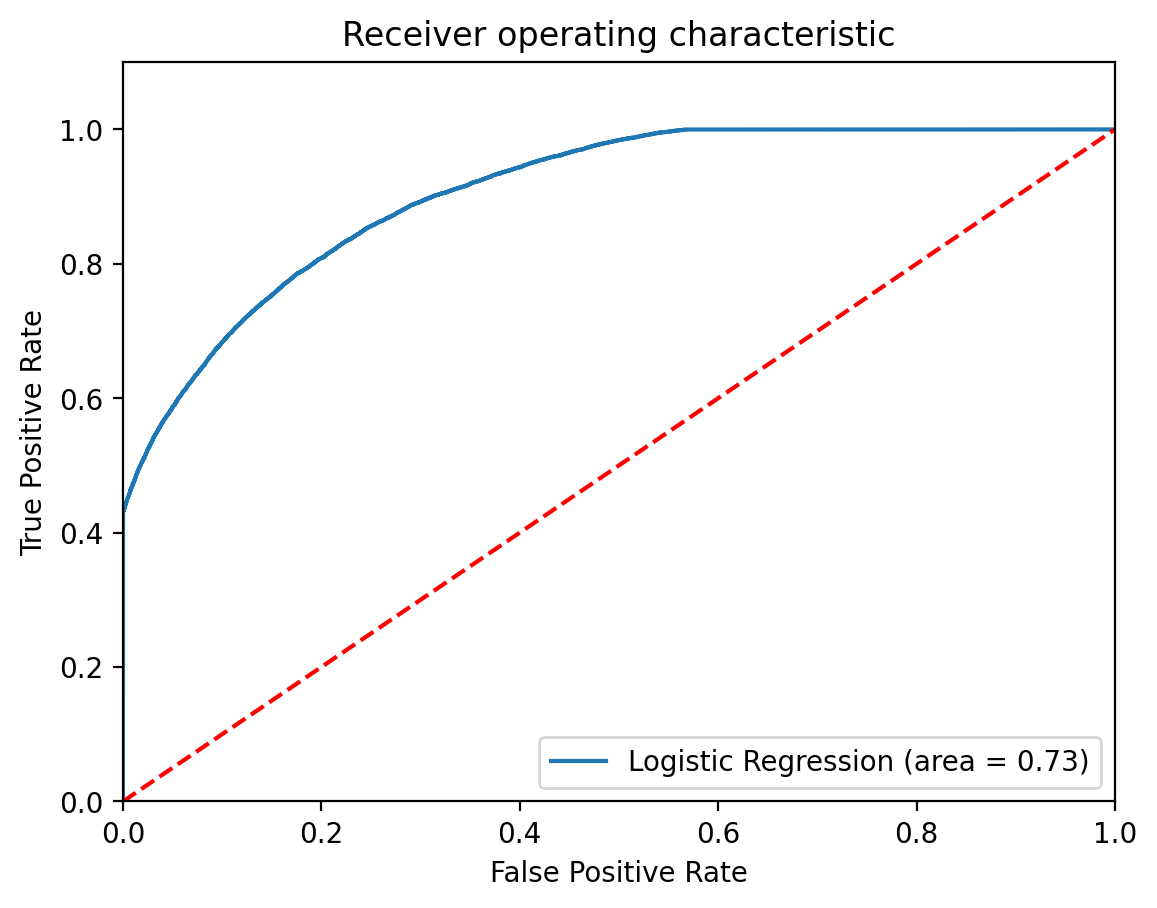

In [607]:
score = roc_auc_score(y_test,y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The above plot shows us the true positive rate and false positive rates for different thresholds of probabilities.

The higher the area of blue curve the better is our model.

The red dotted line shows a random model which has an roc_auc_score of 0.5. 

The threshold is chosen based on optimum value of tpr and fpr according to the business problem being solved.

#### Precision Recall curve

In [608]:
precision,recall,thr = precision_recall_curve(y_test,model.predict_proba(X_test)[:,1])

In [609]:
# Precision and recall will have one extra value.
# The extra value in the precision and recall arrays ensures that all relevant decision thresholds are covered, including the boundary cases where the number of predicted positive samples is either zero or equal to the total number of samples.
len(thr)
len(precision)
len(recall)

83967

83968

83968

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Precision-recall curve at different thresholds')

Text(0.5, 0, 'Threshold values')

Text(0, 0.5, 'Precision and Recall values')

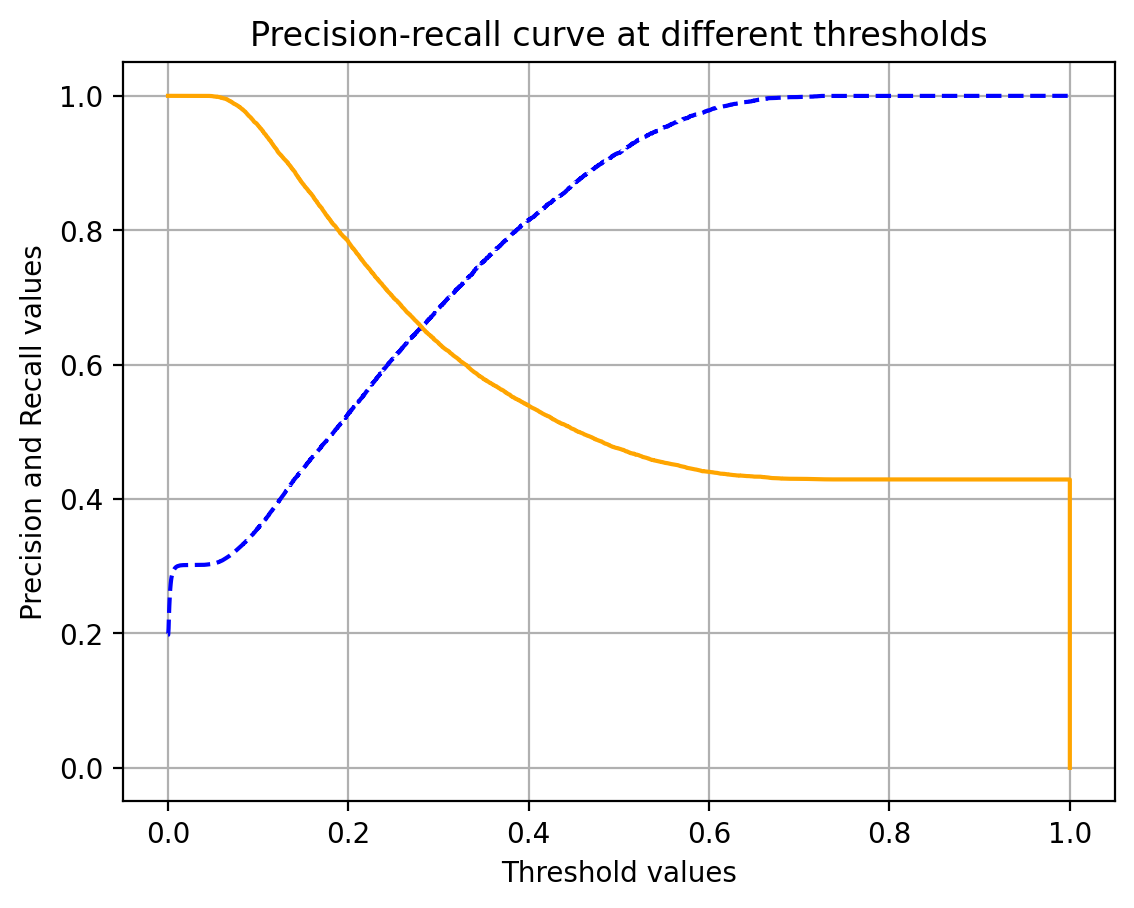

In [610]:
plt.figure()
plt.plot(thr,precision[0:len(thr)],linestyle='--',label='precision',color='blue')
plt.plot(thr,recall[0:len(thr)],label='recall',color='orange')
plt.title("Precision-recall curve at different thresholds")
plt.xlabel("Threshold values")
plt.ylabel("Precision and Recall values")
plt.grid()
plt.show()

The above curve shows us precision and recall values for different thresholds, since both precision and recall are important in our business problem we have to consider a value of 0.3 for the threshold, this means if a model predicts the probability for any person to be more than 0.3 then he/she should be classified as defaulter.

In [611]:
y_pred = model.predict_proba(X_test)[:,1]

threshold_considered = 0.3 

y_pred_custom = (y_pred>threshold_considered).astype('int')
y_pred_custom

array([1, 0, 0, ..., 0, 0, 0])

In [612]:
print(classification_report(y_test,y_pred_custom))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     67347
           1       0.68      0.63      0.66     16620

    accuracy                           0.87     83967
   macro avg       0.80      0.78      0.79     83967
weighted avg       0.87      0.87      0.87     83967



In [613]:
confusion_matrix(y_test,y_pred_custom)

array([[62487,  4860],
       [ 6109, 10511]])

In [614]:
# Let's do multicollinearity check and remove some features which have high VIF and refit the model

#### Multicollinearity check with VIF

* Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model. Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable.

* Multicollinearity can be detected via various methods. One such method is Variance Inflation Factor aka VIF. In VIF method, we pick each independent feature and regress it against all of the other independent features. VIF score of an independent variable represents how well the variable is explained by other independent variables.

* VIF = 1/1-R2

In [615]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    # Calculating the VIF
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif

calc_vif(X_train)

,Feature,VIF
14,sub_grade,182.50
18,application_type,173.03
13,grade,102.55
2,int_rate,90.16
17,purpose,79.04
15,home_ownership,61.32
16,verification_status,38.28
10,total_acc,11.66
6,open_acc,11.14
9,revol_util,7.93


Let's remove the top most vif feature and re-calculate the vif

In [616]:
removed_features =[]
removed_features.append('application_type')
X_train.drop(columns=['application_type'],inplace=True)

In [617]:
calc_vif(X_train)

,Feature,VIF
14,sub_grade,181.62
13,grade,102.32
2,int_rate,90.14
17,purpose,51.25
15,home_ownership,39.90
16,verification_status,33.97
10,total_acc,11.66
6,open_acc,10.95
9,revol_util,7.66
5,dti,7.41


Since the VIF is very high we can remove 3-4 features at once and can check for VIF again

In [618]:
removed_features.extend(['sub_grade','grade','int_rate','purpose'])
X_train.drop(columns=['sub_grade','grade','int_rate','purpose'],inplace=True)

In [619]:
calc_vif(X_train)

,Feature,VIF
13,verification_status,29.82
12,home_ownership,23.99
9,total_acc,11.62
5,open_acc,10.87
4,dti,7.31
8,revol_util,6.93
0,loan_amnt,5.62
2,emp_length,3.19
3,annual_inc,2.82
10,mort_acc,2.49


In [620]:
removed_features.extend(['home_ownership','earliest_cr_year','verification_status','issue_year'])
X_train.drop(columns=['home_ownership','earliest_cr_year','verification_status','issue_year'],inplace=True)

KeyError: "['earliest_cr_year', 'issue_year'] not found in axis"

In [464]:
calc_vif(X_train)

,Feature,VIF
9,total_acc,11.52
5,open_acc,10.62
4,dti,6.81
8,revol_util,5.71
0,loan_amnt,5.12
13,earliest_cr_month,3.37
12,issue_month,3.25
2,emp_length,3.09
3,annual_inc,2.74
10,mort_acc,2.32


In [465]:
# Now with these features let's refit the model
removed_features
X_test.drop(columns=removed_features,inplace=True)

['application_type',
 'sub_grade',
 'grade',
 'int_rate',
 'purpose',
 'home_ownership',
 'earliest_cr_year',
 'verification_status',
 'issue_year']

In [466]:
X_test_cv.drop(columns=removed_features,inplace=True)

In [467]:
model2 = LogisticRegression(max_iter=1000,solver='liblinear',random_state=1,n_jobs=-1)

In [468]:
model2.fit(X_train,y_train)

LogisticRegression(max_iter=1000, n_jobs=-1, random_state=1, solver='liblinear')

In [469]:
model2.score(X_test,y_test)

0.8870985029833148

In [470]:
print(classification_report(y_test,model2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     67347
           1       0.98      0.44      0.61     16620

    accuracy                           0.89     83967
   macro avg       0.93      0.72      0.77     83967
weighted avg       0.90      0.89      0.87     83967



In [471]:
confusion_matrix(y_test,model2.predict(X_test))

array([[67226,   121],
       [ 9359,  7261]])